In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')
display(train , test)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [4]:
train['is_train'] = 1
test['is_train'] = 0

df = pd.concat([train, test], ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
 11  is_train         10695 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1002.8+ KB


In [6]:
df.shape

(10695, 12)

In [7]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,is_train
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


In [8]:
df.drop(columns=['ID' , 'Var_1'] , inplace=True)

In [9]:
df.isna().sum()

,0
Gender,0
Ever_Married,190
Age,0
Graduated,102
Profession,162
Work_Experience,1098
Spending_Score,0
Family_Size,448
Segmentation,2627
is_train,0


In [10]:
df.select_dtypes(include=['object']).columns.tolist()

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Segmentation']

In [11]:
cat_cols = ['Gender','Ever_Married','Graduated','Profession','Spending_Score']
for column in cat_cols:
    if df[column].isnull().sum() > 0:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
num_cols = df.select_dtypes(include=['int64' , 'float64']).columns
for column in num_cols:
    if df[column].isnull().sum() > 0:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

In [12]:
df.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Segmentation,2627
is_train,0


In [13]:
df['Segmentation'].value_counts()

,count
Segmentation,
D,2268
A,1972
C,1970
B,1858


In [14]:
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
df.drop(columns=['Segmentation'], inplace=True)

In [16]:
train = df[df['is_train'] == 1].drop(columns=['is_train'])
test = df[df['is_train'] == 0].drop(columns=['is_train'])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

In [23]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(train_pca)

  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

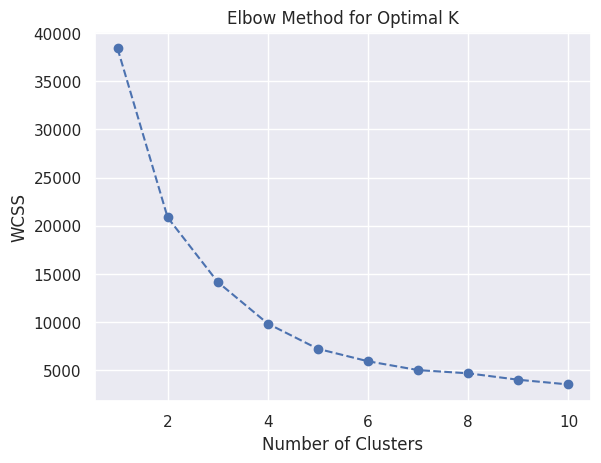

In [24]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')

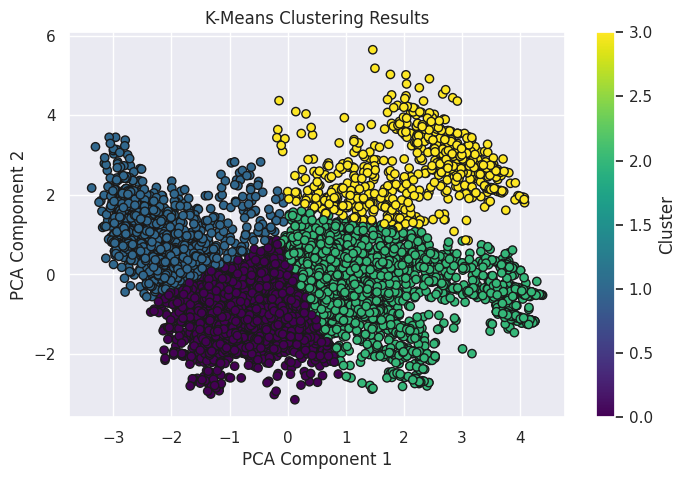

In [40]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
train_clusters = kmeans.fit_predict(train_pca)
test_clusters = kmeans.predict(test_pca)

train['KMeans_Cluster'] = train_clusters
test['KMeans_Cluster'] = test_clusters


plt.figure(figsize=(8, 5))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train_clusters, cmap='viridis', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster')

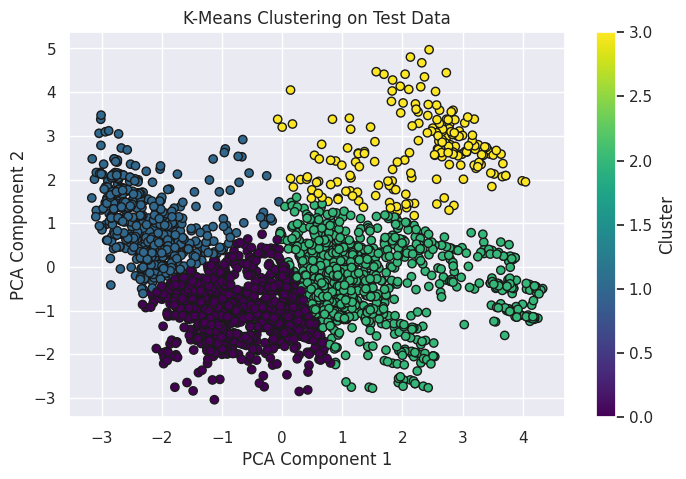

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(test_pca[:, 0], test_pca[:, 1], c=test_clusters, cmap='viridis', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Test Data')
plt.colorbar(label='Cluster')

Text(0, 0.5, 'Distance')

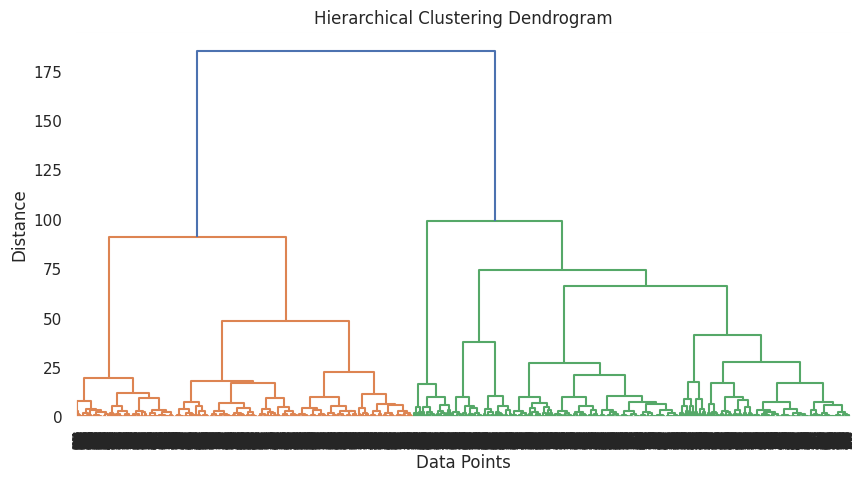

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(train_pca, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")

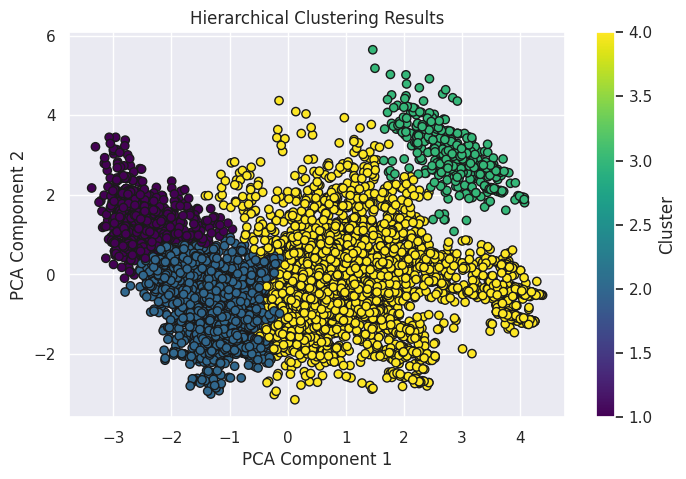

In [41]:
hierarchical_labels = fcluster(linkage_matrix, 4, criterion='maxclust')

train['Hierarchical_Cluster'] = hierarchical_labels

plt.figure(figsize=(8, 5))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=hierarchical_labels, cmap='viridis', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering Results')
plt.colorbar(label='Cluster')

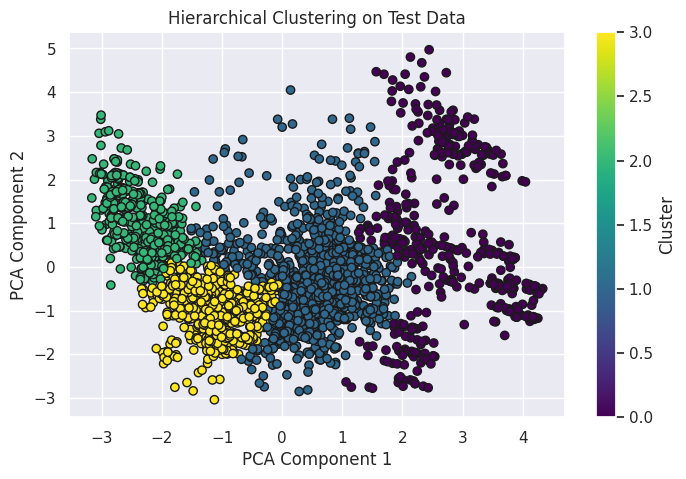

In [43]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4)
test_clusters_hierarchical = hierarchical.fit_predict(test_pca)
plt.figure(figsize=(8, 5))
plt.scatter(test_pca[:, 0], test_pca[:, 1], c=test_clusters_hierarchical, cmap='viridis', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering on Test Data')
plt.colorbar(label='Cluster')
plt.show()